# Serie A - Pressing


In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from matplotlib import cm
from highlight_text import fig_text
import pandas as pd
import matplotlib.colors as mcolors

from PIL import Image
import urllib
import os

In [2]:
font_path = "assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")


## Leggere il dataframe

In [3]:
import ScraperFC as sfc
import traceback

# Initialize the Understat scraper
scraper = sfc.Understat()
try:
    # Scrape the table
    table = scraper.scrape_league_table(year=2023, league="Serie A")
    #formations = scraper.scrape_formations(year=2023, league="Serie A")

except:
    # Catch and print any exceptions. This allows us to still close the
    # scraper below, even if an exception occurs.
    traceback.print_exc()
finally:
    # It"s important to close the scraper when you"re done with it. Otherwise,
    # you"ll have a bunch of webdrivers open and running in the background.
    scraper.close()

table

[WDM] - Downloading: 100%|██████████| 6.30M/6.30M [00:00<00:00, 14.1MB/s]


,№,Team,M,W,D,L,G,GA,PTS,xG,NPxG,xGA,NPxGA,NPxGD,PPDA,OPPDA,DC,ODC,xPTS
0,1,Napoli,38,28,6,4,77,28,90,71.73,64.11,31.96,30.44,33.67,9.47,16.92,356,175,78.51
1,2,Lazio,38,22,8,8,60,30,74,54.31,48.08,42.65,41.13,6.95,14.10,14.28,276,198,59.24
2,3,Inter,38,23,3,12,71,42,72,71.97,68.16,36.05,33.76,34.40,10.33,17.73,325,187,76.37
3,4,Juventus,38,22,6,10,56,33,72,59.74,55.06,40.98,37.18,17.88,12.61,12.02,214,197,64.38
4,5,AC Milan,38,20,10,8,64,43,70,69.9,66.09,40.11,36.30,29.79,9.30,13.63,279,206,69.94
5,6,Atalanta,38,19,7,12,66,48,64,60.49,54.23,45.01,42.73,11.50,11.32,12.87,315,189,61.74
6,7,Roma,38,18,9,11,50,38,63,64.02,56.32,32.9,30.61,25.71,12.59,10.91,231,138,71.35
7,8,Fiorentina,38,15,11,12,53,43,56,56.9,52.34,48.92,42.83,9.50,8.90,11.93,273,173,56.65
8,9,Bologna,38,14,12,12,53,49,54,45.29,40.72,55.54,48.69,-7.97,10.04,14.18,177,231,45.84
9,10,Torino,38,14,11,13,42,41,53,47.32,45.80,39.99,35.42,10.37,11.70,13.97,213,178,56.38


In [24]:
df = pd.read_csv('data/pressing_ppda.csv', index_col=0)
df = df.sort_values(by='PPDA').reset_index(drop=True)

df

,team_id,Team,PPDA,OPPDA
0,8535,Fiorentina,8.90,11.93
1,8524,Atalanta,9.30,13.63
2,9875,Napoli,9.47,16.92
3,9857,Bologna,10.04,14.18
4,9885,Juventus,10.33,17.73
5,9881,Spezia,10.91,9.92
6,8564,AC Milan,11.32,12.87
7,9804,Torino,11.41,12.64
8,9888,Lecce,11.55,8.33
9,6504,Monza,11.70,13.97


## Visualizzazione

In [36]:
gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]
gradient.reverse()

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_15152\217949825.py:16: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [37]:
def plot_bar(ax, fig, df):

    data = df.copy()
    data = (
        data
        .sort_values(by = "PPDA", ascending = True)
        .reset_index(drop = True)
    )
    width = 0.7
    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['PPDA'].min(),vmax=data['PPDA'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data["PPDA"],
        color=cmap(norm(data["PPDA"])),
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data["PPDA"]):
    
        format_str = f"{value:.2f}"
        text_ = ax.annotate(
            xy = (index, value-0.2),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 18, 2)])

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,16),
        xytext=(6, 16),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,16),
        xytext=(13, 16),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,16),
        xytext=(6, 16),
        text='pressing più intenso',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,16),
        xytext=(13, 16),
        text='pressing meno intenso',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

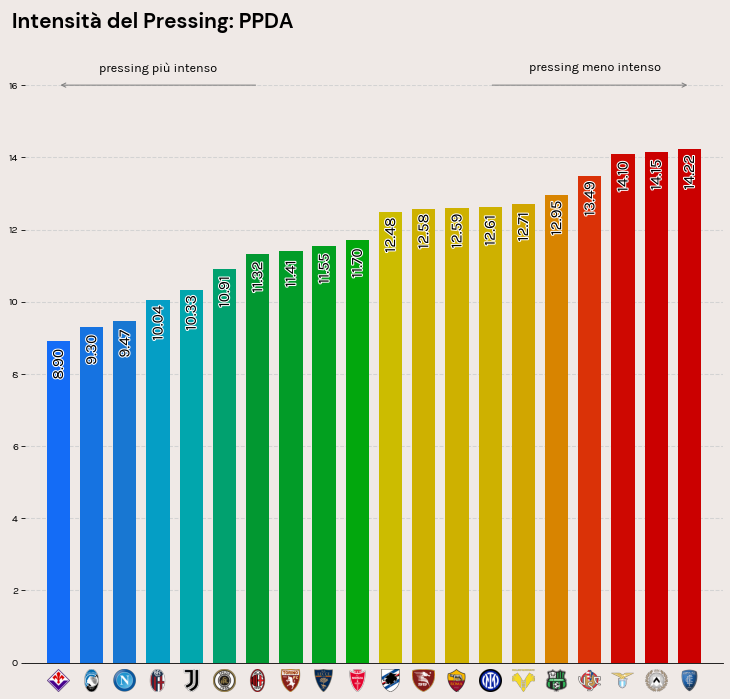

In [38]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Intensità del Pressing: PPDA",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)


plt.savefig(
	"figures/SerieA_PPDA.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)
